# Naive Bayes


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_train = pd.read_csv('SalaryData_Train.csv.crdownload')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test = pd.read_csv('SalaryData_test.csv')
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [5]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [6]:
salary_train.shape

(18039, 14)

In [7]:
salary_test.shape

(15060, 14)

In [8]:
salary_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18034    False
18035    False
18036    False
18037    False
18038    False
Length: 18039, dtype: bool

In [9]:
salary_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [10]:
salary_train['Salary'].value_counts()

 <=50K    13600
 >50K      4439
Name: Salary, dtype: int64

In [11]:
salary_test['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [12]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,18039.000000,18039.000000,18039.000000,18039.000000,18039.000000
mean,38.477188,10.125672,1076.431676,88.917346,40.905926
std,13.161564,2.531869,7374.354027,403.735036,11.892498
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [13]:
salary_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [14]:
salary_train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.036491,0.075601,0.058119,0.091763
educationno,0.036491,1.000000,0.123179,0.076048,0.148779
capitalgain,0.075601,0.123179,1.000000,-0.032150,0.077645
capitalloss,0.058119,0.076048,-0.032150,1.000000,0.053033
hoursperweek,0.091763,0.148779,0.077645,0.053033,1.000000


In [15]:
salary_test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


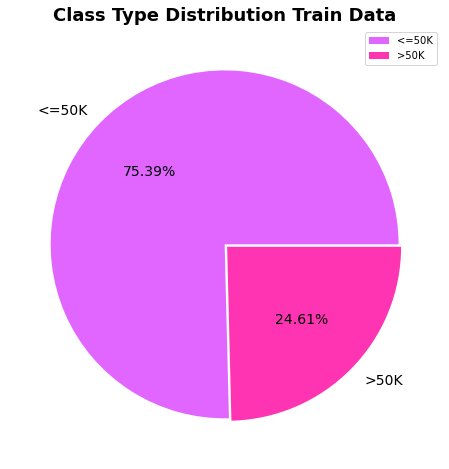

In [16]:
plt.figure(figsize=(8,8))
plt.pie(salary_train['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#E066FF", "#FF34B3"], explode=[0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Train Data", fontsize= 18, fontweight= 'bold')
plt.show()

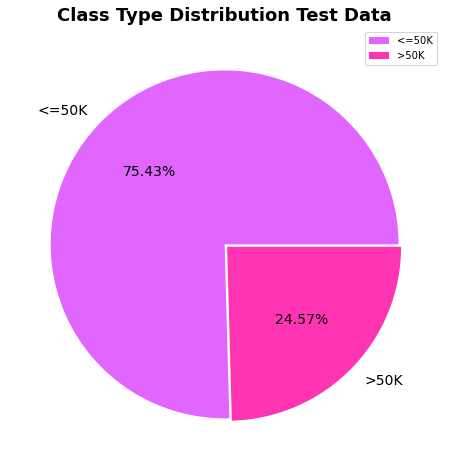

In [17]:
plt.figure(figsize=(8,8))
plt.pie(salary_test['Salary'].value_counts(), labels= ['<=50K','>50K'], autopct= '%.2f%%',
        colors= ["#E066FF", "#FF34B3"], explode= [0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.title("Class Type Distribution Test Data", fontsize= 18, fontweight= 'bold')
plt.show()

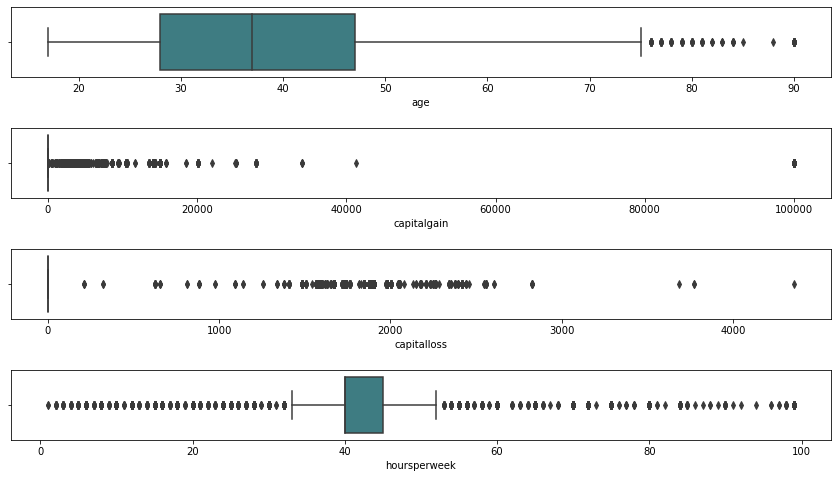

In [18]:
outlier1 = salary_train.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

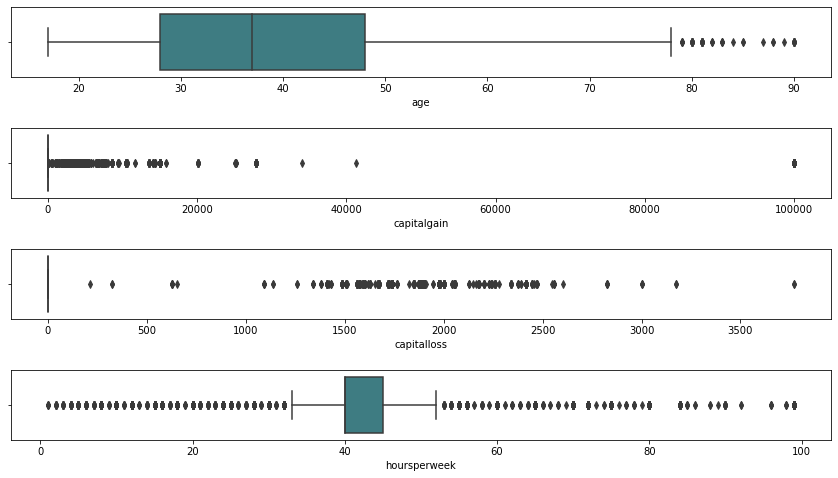

In [19]:
outlier2 = salary_test.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the dataframe but we can't drop them.

# find categorical variables

In [20]:
categorical = [var for var in salary_train.columns if salary_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [21]:
# view the categorical variables
salary_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


There are 9 categorical variables.

Salary is the target variable.

# Frequency counts for  categorical variables

In [22]:
# view frequency counts of values in categorical variables
for var in categorical: 
  print(salary_train[var].value_counts())

 Private             13295
 Self-emp-not-inc     1513
 Local-gov            1241
 State-gov             768
 Self-emp-inc          643
 Federal-gov           574
 Without-pay             5
Name: workclass, dtype: int64
 HS-grad         5972
 Some-college    3979
 Bachelors       3046
 Masters          968
 Assoc-voc        766
 11th             616
 Assoc-acdm       585
 10th             498
 7th-8th          327
 Prof-school      312
 9th              272
 Doctorate        222
 12th             204
 5th-6th          167
 1st-4th           85
 Preschool         20
Name: education, dtype: int64
 Married-civ-spouse       8377
 Never-married            5832
 Divorced                 2535
 Separated                 562
 Widowed                   502
 Married-spouse-absent     218
 Married-AF-spouse          13
Name: maritalstatus, dtype: int64
 Prof-specialty       2416
 Craft-repair         2375
 Exec-managerial      2346
 Adm-clerical         2292
 Sales                2186
 Other-servic

In [23]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(salary_train[var].value_counts()/np.float(len(salary_train)))

 Private             0.737014
 Self-emp-not-inc    0.083874
 Local-gov           0.068795
 State-gov           0.042574
 Self-emp-inc        0.035645
 Federal-gov         0.031820
 Without-pay         0.000277
Name: workclass, dtype: float64
 HS-grad         0.331060
 Some-college    0.220578
 Bachelors       0.168856
 Masters         0.053662
 Assoc-voc       0.042464
 11th            0.034148
 Assoc-acdm      0.032430
 10th            0.027607
 7th-8th         0.018127
 Prof-school     0.017296
 9th             0.015078
 Doctorate       0.012307
 12th            0.011309
 5th-6th         0.009258
 1st-4th         0.004712
 Preschool       0.001109
Name: education, dtype: float64
 Married-civ-spouse       0.464383
 Never-married            0.323300
 Divorced                 0.140529
 Separated                0.031155
 Widowed                  0.027829
 Married-spouse-absent    0.012085
 Married-AF-spouse        0.000721
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13393

# find numerical variables

In [24]:
numerical = [var for var in salary_train.columns if salary_train[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [25]:
# view the numerical variables
salary_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


# find discrete variable

In [26]:
discrete = [feature for feature in numerical if len(salary_train[feature].unique())<25]
print('There are {} discrete variables\n'.format(len(discrete)))


There are 1 discrete variables



# find continuous variable

In [27]:
continuous = [feature for feature in numerical if len(salary_train[feature].unique())<25]
print('There are {} continuous variables\n'.format(len(continuous)))

There are 1 continuous variables



In [28]:
#processing data

In [29]:
le = LabelEncoder()

In [30]:
def encoding(i):
    cols = salary_train.columns
    salary_train[cols[i]]=le.fit_transform(salary_train[cols[i]])
    salary_test[cols[i]]=le.fit_transform(salary_test[cols[i]])

In [31]:
a = [1,2,4,5,6,7,8,12,13]
for i in a:
    encoding(i)

In [32]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18034,52,2,8,11,2,3,0,4,1,0,0,40,37,0
18035,55,2,11,9,2,5,0,4,1,0,1887,40,37,1
18036,31,2,0,6,2,11,0,4,1,0,0,40,37,0
18037,55,2,11,9,2,11,0,4,1,0,0,40,37,0


In [33]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


# Model Building

In [34]:
X_train = salary_train.drop('Salary',axis=1)
y_train = salary_train[['Salary']]
X_test = salary_test.drop('Salary',axis=1)
y_test = salary_test[['Salary']]

In [35]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18034,52,2,8,11,2,3,0,4,1,0,0,40,37
18035,55,2,11,9,2,5,0,4,1,0,1887,40,37
18036,31,2,0,6,2,11,0,4,1,0,0,40,37
18037,55,2,11,9,2,11,0,4,1,0,0,40,37


In [36]:
y_train

,Salary
0,0
1,0
2,0
3,0
4,0
...,...
18034,0
18035,1
18036,0
18037,0


In [37]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test  :",X_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test  :",y_test.shape)

Shape of X_train : (18039, 13)
Shape of X_test  : (15060, 13)
Shape of y_train : (18039, 1)
Shape of y_test  : (15060, 1)


# Gausian Naive Bayes

In [38]:
# training the model on training set
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred_train)*100)

Gaussian Naive Bayes model accuracy(in %): 0.7978823659848107
Gaussian Naive Bayes model accuracy(in %): 79.78823659848106


In [41]:
cm=confusion_matrix(y_train, y_pred_train)
cm

array([[12920,   680],
       [ 2966,  1473]], dtype=int64)

In [42]:
# making predictions on the testing set
y_pred_test = gnb.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_test)*100)

Gaussian Naive Bayes model accuracy(in %): 79.59495351925631


# Categorical Naive bayes

In [44]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()

In [45]:
salary_train_label=salary_train.copy()

In [46]:
salary_test_label=salary_train.copy()

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
salary_train_label.iloc[:, -1] = labelencoder.fit_transform(salary_train_label.iloc[:,-1])
salary_train_label.iloc[:, 0] = labelencoder.fit_transform(salary_train_label.iloc[:,0])
salary_train_label.iloc[:, 1] = labelencoder.fit_transform(salary_train_label.iloc[:,1])
salary_train_label.iloc[:, 2] = labelencoder.fit_transform(salary_train_label.iloc[:,2])
salary_train_label.iloc[:, 3] = labelencoder.fit_transform(salary_train_label.iloc[:,3])

In [48]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
salary_test_label.iloc[:, -1] = labelencoder.fit_transform(salary_test_label.iloc[:,-1])
salary_test_label.iloc[:, 0] = labelencoder.fit_transform(salary_test_label.iloc[:,0])
salary_test_label.iloc[:, 1] = labelencoder.fit_transform(salary_test_label.iloc[:,1])
salary_test_label.iloc[:, 2] = labelencoder.fit_transform(salary_test_label.iloc[:,2])
salary_test_label.iloc[:, 3] = labelencoder.fit_transform(salary_test_label.iloc[:,3])

In [49]:
X_train=salary_train_label.iloc[:,:-1]
Y_train=salary_train_label.iloc[:,-1]

In [50]:
X_test=salary_test_label.iloc[:,:-1]
Y_test=salary_test_label.iloc[:,-1]

In [51]:
clf.fit(X_train,Y_train)

CategoricalNB()

In [52]:
clf.fit(X_test,Y_test)

CategoricalNB()

In [53]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
        pred = clf.predict(X_train)
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test, train=True)


Accuracy Score: 85.62%


# confusion matrix

In [54]:
cm=confusion_matrix(y_test, y_pred_test)
cm

array([[10775,   585],
       [ 2488,  1212]], dtype=int64)

<AxesSubplot:>

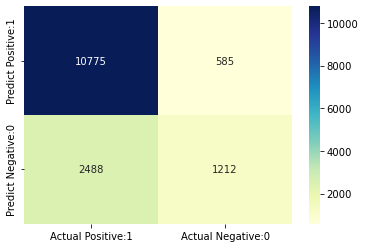

In [55]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [56]:
#ROC-AUC Score

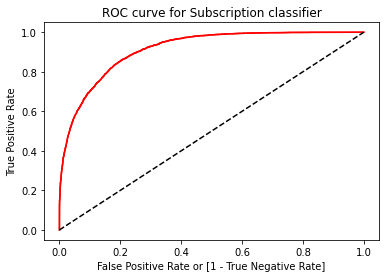

ROC-AUC Score: 0.638035544347164


In [58]:
fpr,tpr,thresholds = roc_curve(y_train,clf.predict_proba(X_train)[:,1])
plt.plot(fpr,tpr,color= 'red')
auc = roc_auc_score(y_test,y_pred_test)

plt.plot(fpr,tpr,color= 'red',label= 'logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve for Subscription classifier')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('ROC-AUC Score:',auc)